# THE SPARKS FOUNDATION

DATA SCIENCE AND BUSINESS ANALYTICS

# NAME : ALISHA D'SOUZA

# PREDICTION USING UNSUPERVISED ML

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the iris dataset
data = load_iris()

In [3]:
# Create a DataFrame
df = pd.DataFrame(data['data'], columns=data['feature_names'])
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2
...,...,...,...,...
145,6.7,3.0,5.2,2.3
146,6.3,2.5,5.0,1.9
147,6.5,3.0,5.2,2.0
148,6.2,3.4,5.4,2.3


In [4]:
# Check for null values
print(df.isnull().sum())

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
dtype: int64


In [5]:
# Scale the data
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(df)
scaled_df = pd.DataFrame(scaled_data, columns=data['feature_names'])
scaled_df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,0.222222,0.625000,0.067797,0.041667
1,0.166667,0.416667,0.067797,0.041667
2,0.111111,0.500000,0.050847,0.041667
3,0.083333,0.458333,0.084746,0.041667
4,0.194444,0.666667,0.067797,0.041667
...,...,...,...,...
145,0.666667,0.416667,0.711864,0.916667
146,0.555556,0.208333,0.677966,0.750000
147,0.611111,0.416667,0.711864,0.791667
148,0.527778,0.583333,0.745763,0.916667


In [6]:
# Apply PCA to reduce the dimensions to 2
pca = PCA(n_components=2)
pca_data = pca.fit_transform(scaled_df)
pca_df = pd.DataFrame(pca_data, columns=['PCA Component 1', 'PCA Component 2'])
pca_df

,PCA Component 1,PCA Component 2
0,-0.630703,0.107578
1,-0.622905,-0.104260
2,-0.669520,-0.051417
3,-0.654153,-0.102885
4,-0.648788,0.133488
...,...,...
145,0.551462,0.059841
146,0.407146,-0.171821
147,0.447143,0.037560
148,0.488208,0.149678


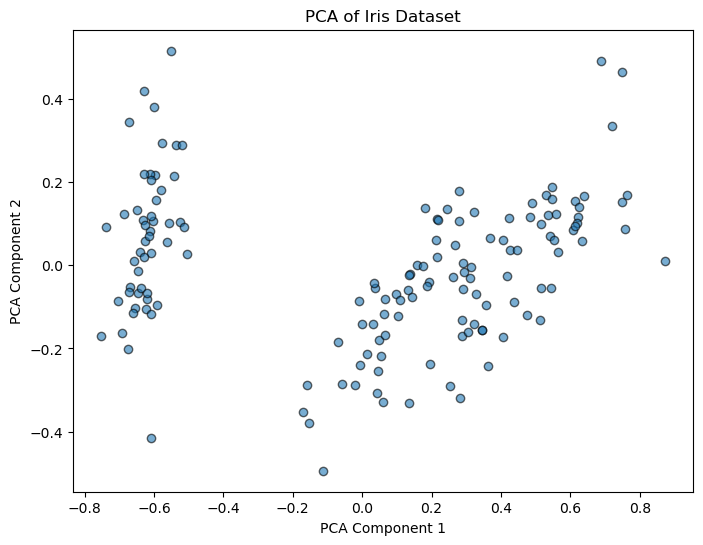

In [7]:
# Plot the PCA components
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA Component 1'], pca_df['PCA Component 2'], alpha=0.6, edgecolors='black')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('PCA of Iris Dataset')
plt.show()

In [8]:
# Apply the Elbow method to determine the optimal number of clusters
inertia = []
for i in range(1, 11):
    model = KMeans(n_clusters=i, n_init="auto", random_state=0)
    model.fit(scaled_df)
    inertia.append(model.inertia_)

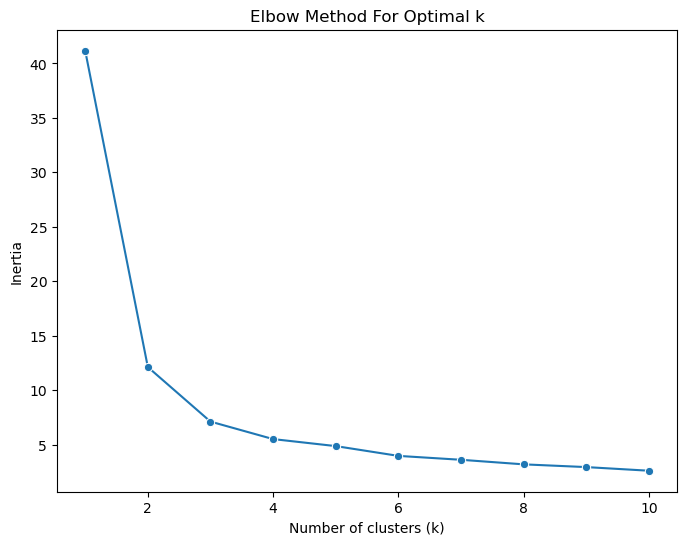

In [9]:
# Plot the elbow curve
plt.figure(figsize=(8, 6))
sns.lineplot(x=range(1, 11), y=inertia, marker='o')
plt.xlabel('Number of clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method For Optimal k')
plt.show()

In [10]:
# Apply KMeans clustering with the optimal number of clusters (let's assume k=3)
model = KMeans(n_clusters=3, n_init="auto", random_state=0)
model.fit(scaled_df)
pred = model.predict(scaled_df)

In [11]:
# Add the cluster labels to the PCA dataframe
pca_df['Cluster'] = pred
pca_df['Original Cluster'] = data['target']

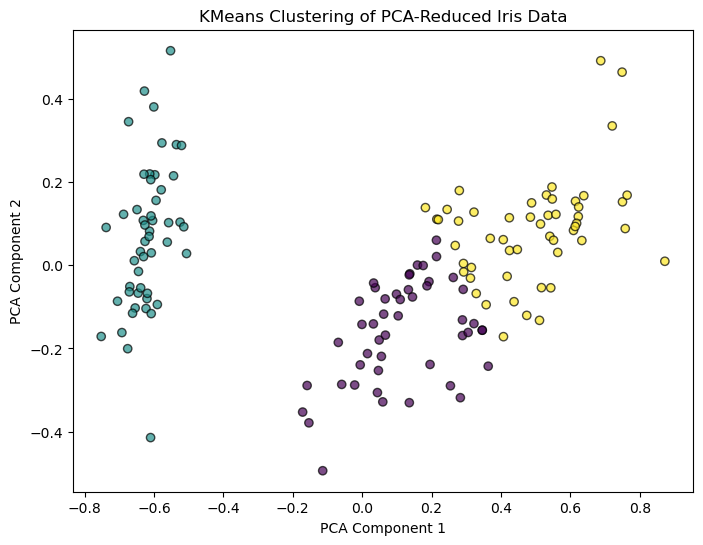

In [12]:
# Plot the clustered data
plt.figure(figsize=(8, 6))
plt.scatter(pca_df['PCA Component 1'], pca_df['PCA Component 2'], c=pca_df['Cluster'], cmap='viridis', edgecolor='black', alpha=0.7)
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('KMeans Clustering of PCA-Reduced Iris Data')
plt.show()